In [1]:
from matplotlib import pyplot as plt
from collections import Counter
from FetusGrowth_BWPrediction import *
import pandas as pd
import numpy as np
from math import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_df = pd.read_csv('seethapathyCleanedData.csv')
data = getMeasurements_int(data_df)

In [3]:
plt.rcParams.update({
"xtick.labelsize": 20,
    "ytick.labelsize": 20,
    'legend.fontsize': 20,
    'axes.labelsize': 25 ,
    
     'axes.titlesize': 20,
   
    'font.serif': 'DejaVu Serif'
    })


##### Gompertz function
Fit, instead, to
$$ f(t) = A \exp(-e^{b-ct}) = A \exp(-e^{-c(t-t_0)})$$
where $A$ = asymptotic full size / overall scale factor (as before), $t_0$ = time shift as before.

Fit $t_0$ and $c$ globally, $A$ locally

In [4]:
A_value = pd.read_csv('Avalue.csv')

A_hc, A_ac,  = list(A_value['Avalue_hc']), list(A_value['Avalue_ac'])
A_bpd, A_fl = list(A_value['Avalue_bpd']), list(A_value['Avalue_fl'])


t0C_list = pd.read_csv('t0_c.csv')

t0_hc,c_hc = t0C_list['t0_hc'][0], t0C_list['c_hc'][0]
t0_ac,c_ac = t0C_list['t0_ac'][0], t0C_list['c_ac'][0]
t0_bpd,c_bpd = t0C_list['t0_bpd'][0], t0C_list['c_bpd'][0]
t0_fl,c_fl = t0C_list['t0_fl'][0], t0C_list['c_fl'][0]

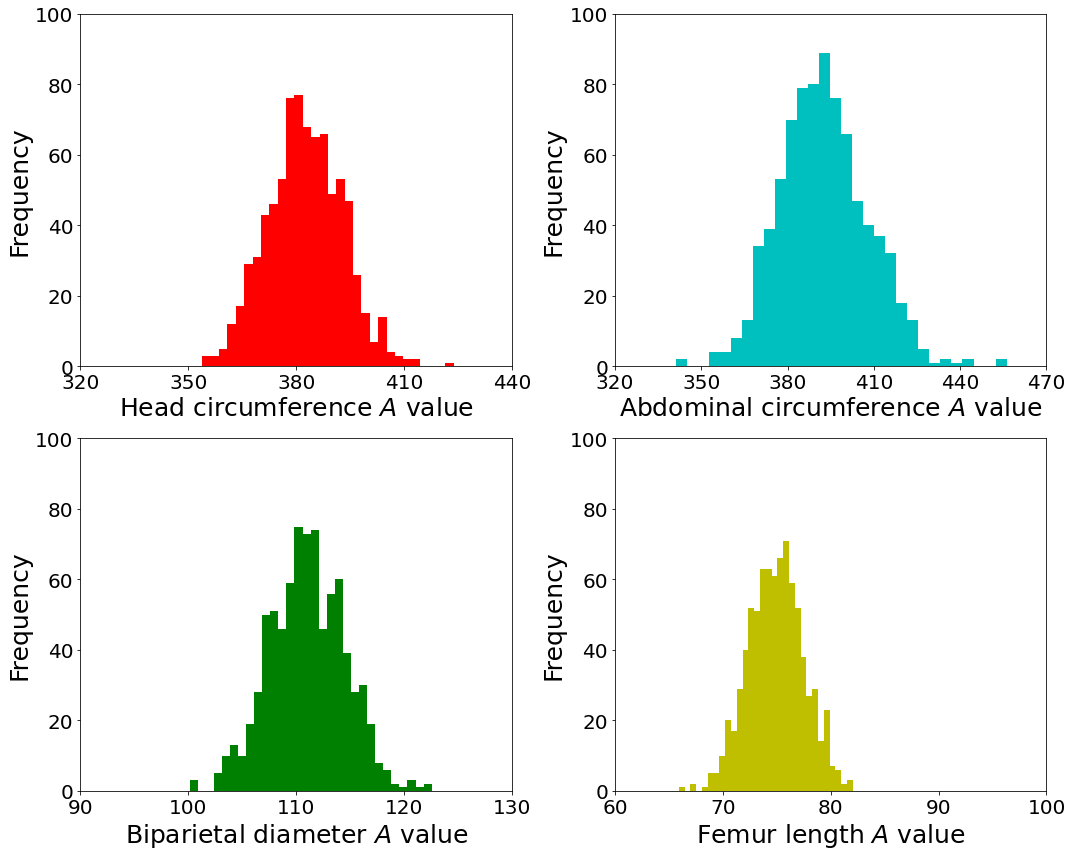

In [5]:
# Histogram for the distribution of A value of different parameters

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

ax[0,0].hist(A_hc, bins=30,color = "r");
ax[0,1].hist(A_ac, bins=30,color = "c");
ax[1,0].hist(A_bpd, bins=30,color = "g");
ax[1,1].hist(A_fl, bins=30,color = "y");

    
ax[0][0].set_xlabel('Head circumference $A$ value')
ax[0][0].set_ylabel('Frequency')

ax[0][1].set_xlabel('Abdominal circumference $A$ value')
ax[0][1].set_ylabel('Frequency')

ax[1][0].set_xlabel('Biparietal diameter $A$ value')
ax[1][0].set_ylabel('Frequency')

ax[1][1].set_xlabel('Femur length $A$ value')
ax[1][1].set_ylabel('Frequency');

ax[0][0].set_xticks(np.arange(320, 441, 30))
ax[0][0].set_yticks(np.arange(0, 101, 20))

ax[0][1].set_xticks(np.arange(320, 500, 30))
ax[0][1].set_yticks(np.arange(0, 101, 20))

ax[1][0].set_xticks(np.arange(90, 131, 10))
ax[1][0].set_yticks(np.arange(0, 101, 20))

ax[1][1].set_xticks(np.arange(60, 101, 10))
ax[1][1].set_yticks(np.arange(0, 101, 20))


plt.tight_layout()
plt.savefig('FigOutput/Avalue.png',dpi = 600,bbox_inches='tight')
plt.savefig('FigOutput/Avalue.pdf',dpi = 600,bbox_inches='tight')

In [6]:
pidLerrG_hc,pidLerrB_hc,maperr_hc,_ = CalError(data,list(data['GA']),list(data['HC']),A_hc,t0_hc,c_hc)
pidLerrG_ac,pidLerrB_ac,maperr_ac,_ = CalError(data,list(data['GA']),list(data['AC']),A_ac,t0_ac,c_ac)
pidLerrG_bpd,pidLerrB_bpd,maperr_bpd,_ = CalError(data,list(data['GA']),list(data['BPD']),A_bpd,t0_bpd,c_bpd)
pidLerrG_fl,pidLerrB_fl,maperr_fl,_ = CalError(data,list(data['GA']),list(data['FL_Rt']),A_fl,t0_fl,c_fl)

In [7]:
errlist_hc = [maperr_hc[i][1] for i in range(len(maperr_hc))]
errlist_ac = [maperr_ac[i][1] for i in range(len(maperr_ac))]
errlist_bpd = [maperr_bpd[i][1] for i in range(len(maperr_bpd))]
errlist_fl = [maperr_fl[i][1]  for i in range(len(maperr_fl))]

mape_df = pd.DataFrame(list(zip(errlist_hc,errlist_ac,errlist_bpd,errlist_fl)),
               columns =['MAPE_HC','MAPE_AC','MAPE_BPD','MAPE_FL_Rt'])

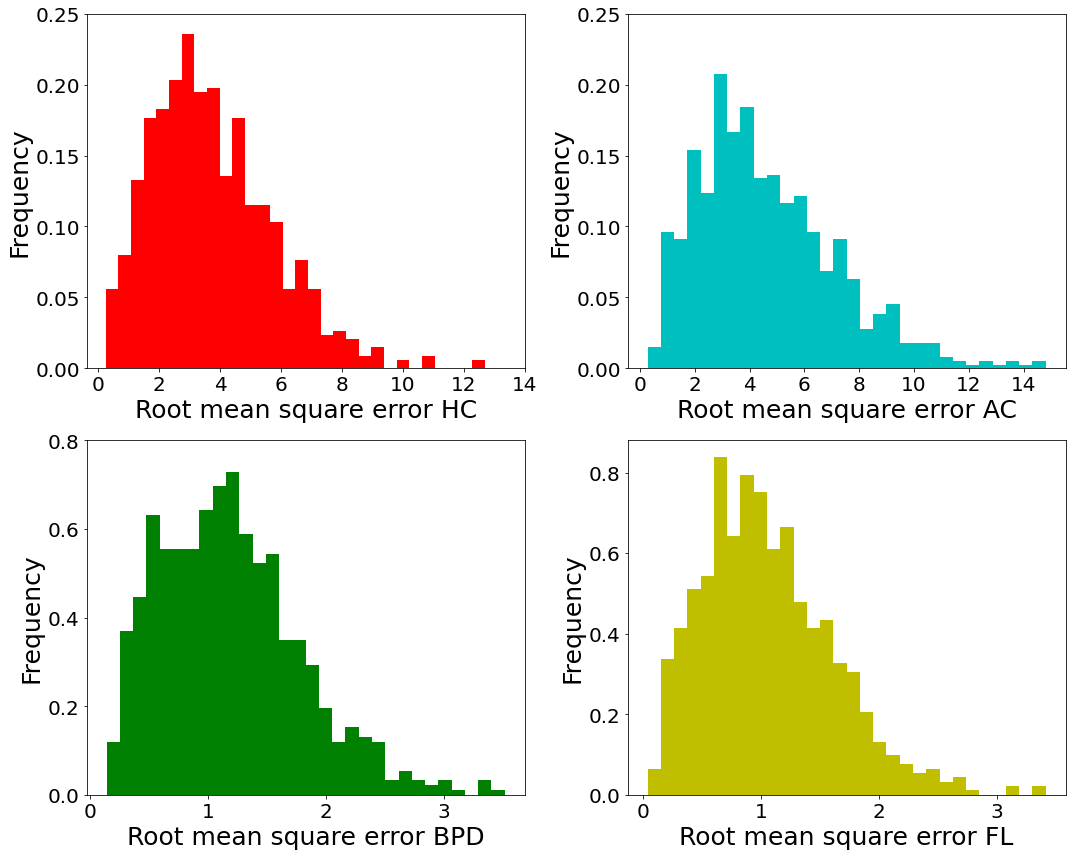

In [8]:
# histogram plot for MSE error

fig, ax = plt.subplots(2, 2, figsize=(15, 12))
#maperr_hc, bins = range(0,int(max(maperr_hc)),10)

ax[0,0].hist(errlist_hc, bins = 30, density=True, color = "r");
ax[0,1].hist(errlist_ac, bins = 30, density=True, color = "c");
ax[1,0].hist(errlist_bpd, bins = 30, density=True, color = "g");
ax[1,1].hist(errlist_fl, bins = 30, density=True, color = "y");


#ax[0,0].hist(errlist_hc, bins = range(0,int(max(errlist_hc)),10),color = "r");
#ax[0,1].hist(errlist_ac, bins = range(0,int(max(errlist_ac)),10),color = "c");
#ax[1,0].hist(errlist_bpd, bins = range(0,int(max(errlist_bpd)),10),color = "g");
#ax[1,1].hist(errlist_fl, bins = range(0,int(max(errlist_fl)),10),color = "y");

 
ax[0][0].set_xlabel('Root mean square error HC')
ax[0][0].set_ylabel('Frequency')

ax[0][1].set_xlabel('Root mean square error AC')
ax[0][1].set_ylabel('Frequency')

ax[1][0].set_xlabel('Root mean square error BPD')
ax[1][0].set_ylabel('Frequency')

ax[1][1].set_xlabel('Root mean square error FL')
ax[1][1].set_ylabel('Frequency');

ax[0][0].set_xticks(np.arange(0, 15, 2))
ax[0][0].set_yticks(np.arange(0, 0.3, 0.05))

ax[0][1].set_xticks(np.arange(0, 16, 2))
ax[0][1].set_yticks(np.arange(0, 0.3, 0.05))

ax[1][0].set_xticks(np.arange(0, 4, 1))
ax[1][0].set_yticks(np.arange(0, 0.9, 0.2))

ax[1][1].set_xticks(np.arange(0, 4, 1))
ax[1][1].set_yticks(np.arange(0, 0.9, 0.2))

#ax[1][0].set_xlim([0, 50])
#ax[0][0].set_ylim([0, 0.6])
#ax[0][1].set_ylim([0, 0.6])
#ax[1][0].set_ylim([0, 0.6])
#ax[1][1].set_ylim([0, 0.6])

plt.tight_layout()
plt.savefig('FigOutput/RMSE.png',dpi = 600,bbox_inches='tight')
plt.savefig('FigOutput/RMSE.pdf',dpi = 600,bbox_inches='tight')

In [9]:
binary_mape_df = pd.DataFrame(list(zip(Binarise_BadGoodfit(data, pidLerrG_hc, pidLerrB_hc),
                                       Binarise_BadGoodfit(data, pidLerrG_ac, pidLerrB_ac),
                                       Binarise_BadGoodfit(data, pidLerrG_bpd, pidLerrB_bpd),
                                       Binarise_BadGoodfit(data, pidLerrG_fl, pidLerrB_fl))),
               columns =['B_MAPE_HC','B_MAPE_AC','B_MAPE_BPD','B_MAPE_FL_Rt'])

In [10]:
A_df = pd.DataFrame(list(zip(A_hc,A_ac,A_bpd,A_fl)),
               columns =['A_HC','A_AC','A_BPD','A_FL_Rt'])

In [11]:
master_df = pd.concat([data,mape_df,binary_mape_df,A_df, pd.DataFrame(list(
    binarize_output(binary_mape_df['B_MAPE_HC'],binary_mape_df['B_MAPE_AC'],binary_mape_df['B_MAPE_BPD'],
                   binary_mape_df['B_MAPE_FL_Rt'])),
               columns =['binary_out'])],axis=1, join='inner')

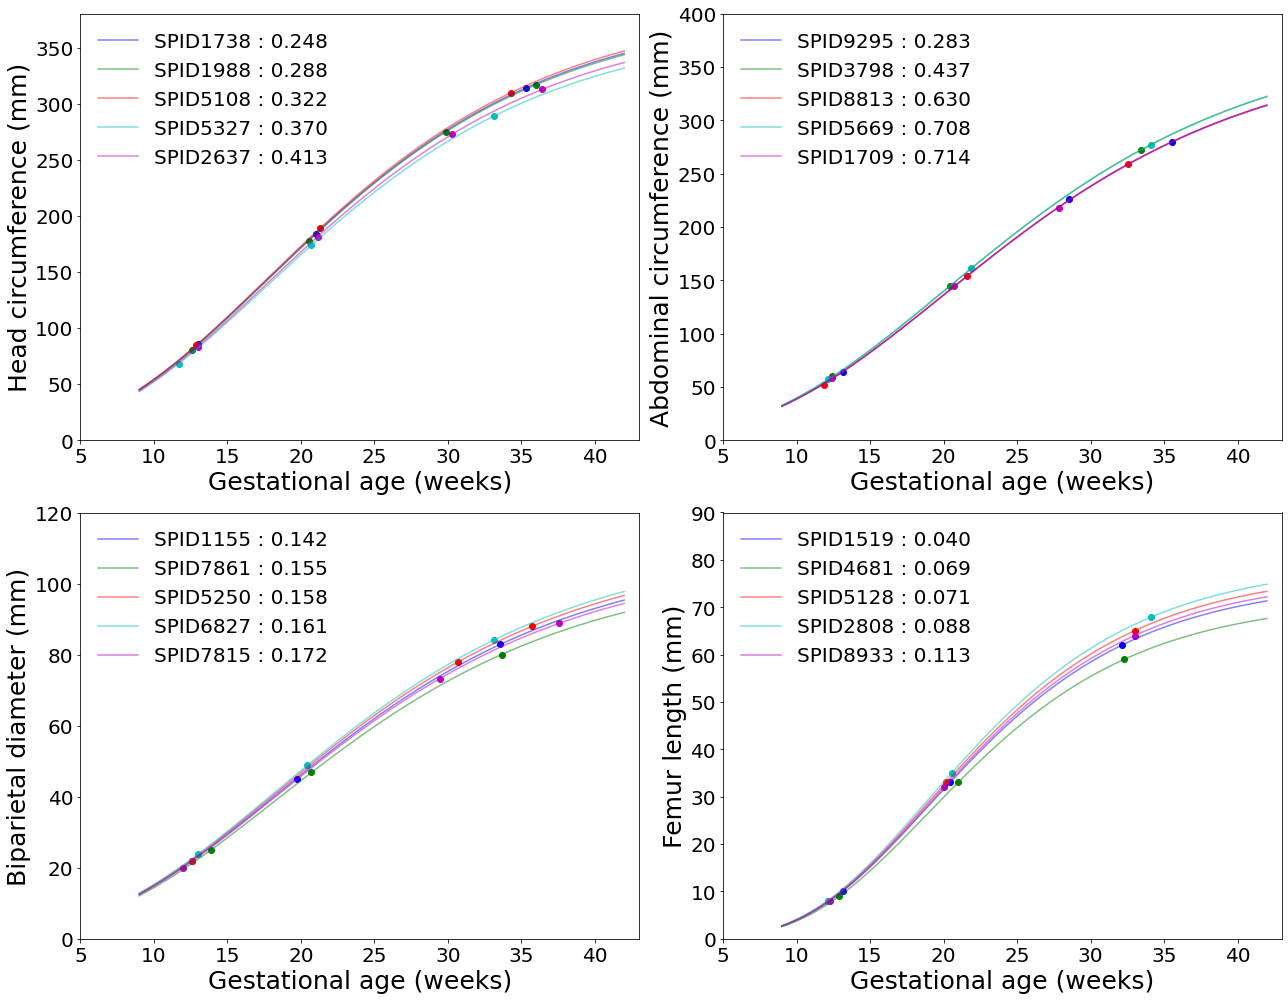

In [12]:
plot_actual_predData(pidLerrG_hc,pidLerrG_ac,pidLerrG_bpd,pidLerrG_fl,master_df,t0_hc,c_hc,t0_ac,c_ac,t0_bpd,c_bpd,
                     t0_fl,c_fl,'good')

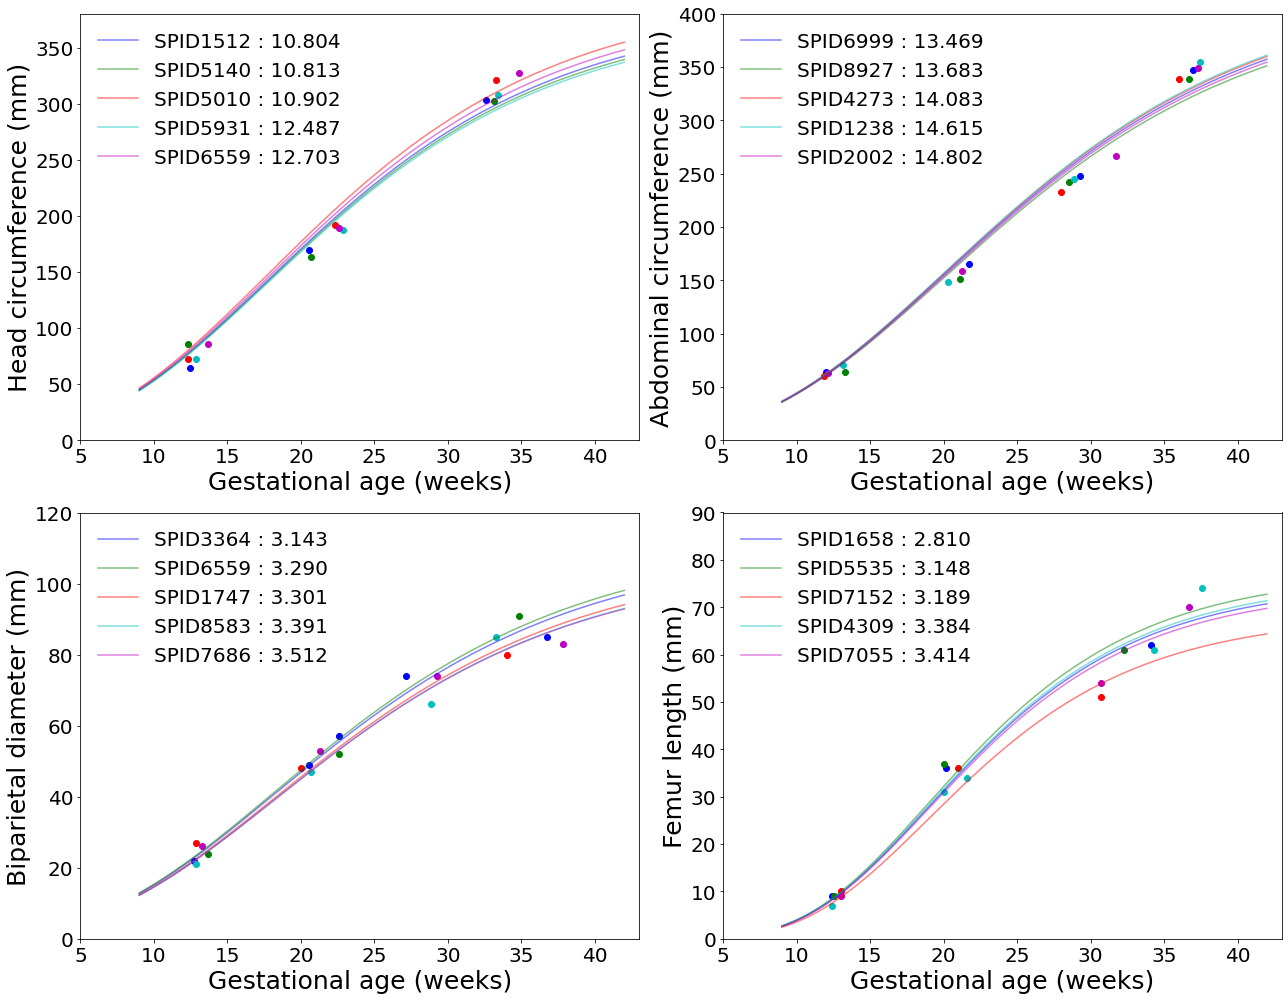

In [13]:
plot_actual_predData(pidLerrB_hc[-5:],pidLerrB_ac[-5:],pidLerrB_bpd[-5:],pidLerrB_fl[-5:],master_df,t0_hc,c_hc,
                     t0_ac,c_ac,t0_bpd,c_bpd,t0_fl,c_fl,'bad')

In [14]:
# Separate dataframe for good fit and badfit assigned by gompertz

nc_df = master_df[['PATIENT_ID','NEONATAL_COMPLICATIONS','binary_out','B_MAPE_HC','B_MAPE_AC','B_MAPE_BPD',
                   'B_MAPE_FL_Rt']]
nc_df['NEONATAL_COMPLICATIONS'] = nc_df['NEONATAL_COMPLICATIONS'].fillna('0');

badfit_df = nc_df[nc_df['binary_out'] == 0]
goodfit_df = nc_df[nc_df['binary_out'] == 1]

badfit_df_hc = nc_df[nc_df['B_MAPE_HC'] == 0]
goodfit_df_hc = nc_df[nc_df['B_MAPE_HC'] == 1]

badfit_df_ac = nc_df[nc_df['B_MAPE_AC'] == 0]
goodfit_df_ac = nc_df[nc_df['B_MAPE_AC'] == 1]

badfit_df_bpd = nc_df[nc_df['B_MAPE_BPD'] == 0]
goodfit_df_bpd = nc_df[nc_df['B_MAPE_BPD'] == 1]

badfit_df_fl = nc_df[nc_df['B_MAPE_FL_Rt'] == 0]
goodfit_df_fl = nc_df[nc_df['B_MAPE_FL_Rt'] == 1]

In [15]:
N = len(nc_df)

# Dictionary of patient with information of having or not complications
dict_data = Counter(list(nc_df['NEONATAL_COMPLICATIONS'])) 

K_NoC = dict_data['0'] # Fetus having no complication
K_HC = N- dict_data['0'] # Fetus having complication

n_bad = len(badfit_df) # Number of Badfit 
n_good = len(goodfit_df) # Number of Goodfit

n_bad_hc = len(badfit_df_hc) # Number of Badfit in HC
n_good_hc = len(goodfit_df_hc) # Number of Goodfit in HC

n_bad_ac = len(badfit_df_ac) # Number of Badfit in AC
n_good_ac = len(goodfit_df_ac) # Number of Goodfit in AC

n_bad_bpd = len(badfit_df_bpd) # Number of Badfit in BPD
n_good_bpd = len(goodfit_df_bpd) # Number of Goodfit in BPD

n_bad_fl = len(badfit_df_fl) # Number of Badfit in FL_Rt
n_good_fl = len(goodfit_df_fl) # Number of Goodfit in FL_Rt

In [16]:
# Dictionary of Badfit patient with information of having or not complications
nc_dict_bad = dict(Counter(list(badfit_df['NEONATAL_COMPLICATIONS']))) 
k_bad_NoC = nc_dict_bad['0'] # Badfit Fetuses having no complication
k_bad_HC = n_bad - nc_dict_bad['0']  # Badfit Fetuses having complication


nc_dict_bad_hc = dict(Counter(list(badfit_df_hc['NEONATAL_COMPLICATIONS']))) 
k_bad_NoC_hc = nc_dict_bad_hc['0'] # Badfit Fetuses having no complication in HC
k_bad_HC_hc = n_bad_hc - nc_dict_bad_hc['0']  # Badfit Fetuses having complication in HC


nc_dict_bad_ac = dict(Counter(list(badfit_df_ac['NEONATAL_COMPLICATIONS']))) 
k_bad_NoC_ac = nc_dict_bad_ac['0'] # Badfit Fetuses having no complication in AC
k_bad_HC_ac = n_bad_ac - nc_dict_bad_ac['0']  # Badfit Fetuses having complication in AC


nc_dict_bad_bpd = dict(Counter(list(badfit_df_bpd['NEONATAL_COMPLICATIONS']))) 
k_bad_NoC_bpd = nc_dict_bad_bpd['0'] # Badfit Fetuses having no complication in BPD
k_bad_HC_bpd = n_bad_bpd - nc_dict_bad_bpd['0']  # Badfit Fetuses having complication in BPD


nc_dict_bad_fl = dict(Counter(list(badfit_df_fl['NEONATAL_COMPLICATIONS']))) 
k_bad_NoC_fl = nc_dict_bad_fl['0'] # Badfit Fetuses having no complication in FL_Rt
k_bad_HC_fl = n_bad_fl - nc_dict_bad_fl['0']  # Badfit Fetuses having complication in FL_Rt

In [17]:
# Dictionary of Goodfit patient with information of having or not complications
nc_dict_good = dict(Counter(list(goodfit_df['NEONATAL_COMPLICATIONS']))) 
k_good_NoC = nc_dict_good['0'] # Goodfit Fetuses having no complication
k_good_HC = n_good - nc_dict_good['0']  # Goodfit Fetuses having complication

In [18]:
nc_dict_good

{'0': 614,
 '4': 100,
 '2,4': 2,
 '2': 4,
 '3': 4,
 '3,UTI': 1,
 '7': 1,
 '5': 5,
 'sterilized': 1,
 'Meconium Gastritis, 4': 1,
 'Postnatal KUB': 1,
 '1': 2,
 '1, 7, 8': 1,
 '1, 3, 4, 5': 1,
 '1, 4': 1,
 '4, Neonatal Hemolytic Anemia': 1,
 'STILL BIRTH': 1,
 '1, 4, 8': 1,
 'IUFD': 2,
 '4, Suspected skeletal dysplasia, Congenital heart disease - PDA with multiple VSD': 1,
 'COMPLETE HEART BLOCK': 1}

In [20]:
nc_dict_bad

{'2': 2, '0': 49, '4': 16, '4,2': 1, '7': 1, '1, 3': 1, '5': 1}

In [ ]:
def MchooseR(M,R):
    #print(M,'! ',lgamma(M+1),R,' ! ',lgamma(R+1),M-R,' ! ',lgamma((M-R)+1))
    return e**(lgamma(M+1)-lgamma(R+1)-lgamma((M-R)+1))


def hypergeomPvalue(N,K,n,k):
    p = 0
    m = k
    while(m != n-1):
        p = p + (MchooseR(K,m) * MchooseR(N-K,n-m))/MchooseR(N,n)
        m = m+1
    return p

In [ ]:
print('Hypergeometric Test for badfit complications: ')
print('N:',N,', K_HC:',K_HC,', n_bad:',n_bad,', k_bad_HC:',k_bad_HC,', p value: ',
      hypergeomPvalue(N,K_HC,n_bad,k_bad_HC),'\n')

print('Hypergeometric Test for Badfit(HC) complications: ')
print('N:',N,', K_HC:',K_HC,', n_bad:',n_bad_hc,', k_bad_HC:',k_bad_HC_hc,', p value: ',
      hypergeomPvalue(N, K_HC, n_bad_hc, k_bad_HC_hc),'\n')

print('Hypergeometric Test for Badfit(AC) complications: ')
print('N:',N,', K_HC:',K_HC,', n_bad:',n_bad_ac,', k_bad_HC:',k_bad_HC_ac,', p value: ',
      hypergeomPvalue(N, K_HC, n_bad_ac, k_bad_HC_ac),'\n')

print('Hypergeometric Test for badfit(BPD) complications: ')
print('N:',N,', K_HC:',K_HC,', n_bad:',n_bad_bpd,', k_bad_HC:',k_bad_HC_bpd,', p value: ',
      hypergeomPvalue(N, K_HC, n_bad_bpd, k_bad_HC_bpd),'\n')

print('Hypergeometric Test for bdfit(FL) complications: ')
print('N:',N,', K_HC:',K_HC,', n_bad:',n_bad_fl,', k_bad_HC:',k_bad_HC_fl,', p value: ',
      hypergeomPvalue(N, K_HC, n_bad_fl, k_bad_HC_fl),'\n')


In [ ]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))
 
# set height of bar
#'{:.3f}'.format((k_good_NoC/n_good)*100)
goodfit = [np.round((k_good_NoC/n_good)*100,1), np.round((k_good_HC/n_good)*100,1)]
badfit = [np.round((k_bad_NoC/n_bad)*100), np.round((k_bad_HC/n_bad)*100)]

 
# Set position of bar on X axis
br1 = np.arange(len(goodfit))
br2 = [x + barWidth for x in br1]
 
# Make the plot
graph1 = plt.bar(br1, goodfit, color ='g', width = barWidth,
        edgecolor ='grey', label ='Good fit')
graph2 = plt.bar(br2, badfit, color ='r', width = barWidth,
        edgecolor ='grey', label ='Bad fit')


i = 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.06,
             str(goodfit[i]),
             ha='center',fontsize=18)
    i+=1

i = 0
for p in graph2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.06,
             str(badfit[i]),
             ha='center',fontsize=18)
    i+=1
# Adding Xticks
plt.ylabel('$\%$ of patients')
plt.xticks([r + (barWidth/2) for r in range(len(badfit))],
        ['No complication','With complication'])

plt.ylim(0,100)
 
plt.legend()
plt.tight_layout() 
plt.savefig('FigOutput/Goodfit_badfit_barplot.png',dpi = 600,bbox_inches='tight')
plt.savefig('FigOutput/Goodfit_badfit_barplot.pdf',dpi = 600,bbox_inches='tight')
plt.show()


In [ ]:
nc_b = dict(Counter(list(data.set_index('PATIENT_ID').loc[list(badfit_df['PATIENT_ID'])]
                         ['NEONATAL_COMPLICATIONS'].fillna('0'))))

nc_g = dict(Counter(list(data.set_index('PATIENT_ID').loc[list(goodfit_df['PATIENT_ID'])]
                         ['NEONATAL_COMPLICATIONS'].fillna('0'))))


nc_pie_g, nc_venn_g = dictForVisualization(nc_g)
nc_pie_b, nc_venn_b = dictForVisualization(nc_b)

total_nc_b = sum(nc_pie_b.values())
total_nc_g = sum(nc_pie_g.values())

# Making a list of percentage of goodfit and badfit neonatal complications 
nc_pie_g_list = [np.round((nc_pie_g['1']/total_nc_g)*100,1),
                 np.round((nc_pie_g['2']/total_nc_g)*100,1),
                 np.round((nc_pie_g['3']/total_nc_g)*100,1),
                 np.round((nc_pie_g['5']/total_nc_g)*100,1),
                 np.round((nc_pie_g['7']/total_nc_g)*100,1),
                 np.round((nc_pie_g['8']/total_nc_g)*100,1),
                 np.round((nc_pie_g['IUFD']/total_nc_g)*100,1),
                 np.round((9/total_nc_g)*100,1)]

nc_pie_b_list = [np.round((nc_pie_b['1']/total_nc_b)*100,1),
                 np.round((nc_pie_b['2']/total_nc_b)*100,1),
                 np.round((nc_pie_b['3']/total_nc_b)*100,1),
                 np.round((nc_pie_b['5']/total_nc_b)*100,1),
                 np.round((nc_pie_b['7']/total_nc_b)*100,1),
                 0,0,0]

In [ ]:
complication = ['Preterm', 'IUGR/SGA ','Sepsis','Respiratory\ndistress', 'LGA','Hypogly-\ncemia', 'IUFD',
                'Other\nComplications']

cm_df = pd.DataFrame(list(zip(complication,nc_pie_g_list,nc_pie_b_list)),
               columns =['Complications','Good fit','Bad fit'])


plt.rcParams["figure.figsize"] = [14, 10]

ax = cm_df.set_index('Complications').plot(kind="bar", align='center', width=0.9,color={"Good fit": "green", 
                                                                                   "Bad fit": "red"})
plt.xticks(rotation=20)
plt.ylabel('% of patients')

    
for bar in ax.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    ax.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=20, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(0,15)
plt.xlabel('')
plt.savefig('FigOutput/Complication_barplot.png',dpi = 600,bbox_inches='tight')
plt.savefig('FigOutput/Complication_barplot.pdf',dpi = 600,bbox_inches='tight')
plt.show()